# Presentación

## Introducción

**TUIA - Minería de Datos** - 2023

---

**Trabajo Práctico Nº 2:**

*   "Unidades 4 y 5"


**Alumno:**  

*   Miguel Mussi

## Objetivo

El objetivo de este trabajo practico es integrar los conocimientos adquiridos en las unidades 4 y 5 en dos problemas reales asociados uno al comportamiento financiero de 1000 empresas y otro a un juego de cartas.

## Actividades (EDITAR)

1. Descargar un conjunto de datos, Crop_recommendation.csv, para realizar el trabajo práctico.

2. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de
datos, etc.) y elegir un método de estandarización.

3. Realizar PCA y determinar el número de componentes principales considerando alguno
de los 3 criterios datos en la práctica. Graficar la varianza acumulada y las componentes
de PCA en un grafico 2 o 3D con sus respectivas clases.

4. Aplicar Isomap y analizar los resultados obtenidos variando el numero de vecinos y
componentes. Realizar un grafico en 2D de utilizando dos componentes.

5. Aplicar t-SNE y analizar los resultados obtenidos variando el número de iteraciones,
componentes y perplejidad. Realizar un gráfico en 2D de utilizando dos componentes.

6. Aplicar K-means y analizar los resultados obtenidos variando el número de clusters y
obtener el número óptimo de clusters mediante GAP. Realizar un gráfico en 3D de
utilizando tres atributos de los datos y donde los colores estén asociados a los clusters.

7. Aplicar clustering jerárquico y determinar cuál número sería el que mejor represente los
datos. Utilizar el score de Silhouette y calcular el número óptimo de cluster por medio de
GAP.


# Desarrollo del TP

In [85]:
#@title Librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# from sklearn.cluster import KMeans

In [ ]:
#@title Sincronización con Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#@title DataFrame

# Path 1 - Referenciado a la carpeta de Drive
file_path= '/content/drive/MyDrive/UNR/4 - Minería de Datos (IA43)/TP2/1000_Companies.csv'
data = pd.read_csv(file_path, sep=',', engine='python')

# Path 2 - Referenciado al mismo directorio
#df_original = pd.read_csv('Crop_recommendation.csv', sep=',', engine='python')

In [ ]:
data.head()

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


## Análisis exploratorio

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   object 
 4   Profit          1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


### Análisis de datos nulos o faltantes

In [ ]:
data.isna().sum()

RyD_Spend         0
Administration    0
MarketingSpend    0
State             0
Profit            0
dtype: int64

Se observa que no existen valores nulos ni faltantes.

### Recategorización del atributo "State".

In [ ]:
data["State"].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

In [ ]:
# Se convierte el tipo de "State" a categoría.
state_maping = {"California": 1, "Florida": 2, "New York": 3}
data["State"] = data["State"].replace(state_maping)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RyD_Spend       1000 non-null   float64
 1   Administration  1000 non-null   float64
 2   MarketingSpend  1000 non-null   float64
 3   State           1000 non-null   int64  
 4   Profit          1000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


In [ ]:
data["State"].value_counts()

1    344
3    334
2    322
Name: State, dtype: int64

Se analiza la distribución equitativa de las clases "State"

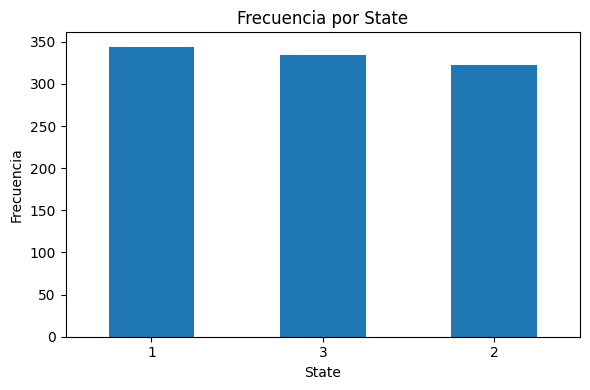

In [ ]:
#@title Cantidad de registros por estado

# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
data['State'].value_counts().plot(kind='bar')
plt.title('Frecuencia por State')
plt.xlabel('State')
plt.ylabel('Frecuencia')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
data.describe()

,RyD_Spend,Administration,MarketingSpend,State,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,1.990000,119546.164656
std,46537.567891,12613.927535,91578.393542,0.823759,42888.633848
min,0.000000,51283.140000,0.000000,1.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,1.000000,85943.198543
50%,79936.000000,122421.612150,224517.887350,2.000000,117641.466300
75%,124565.500000,129139.118000,308189.808525,3.000000,155577.107425
max,165349.200000,321652.140000,471784.100000,3.000000,476485.430000


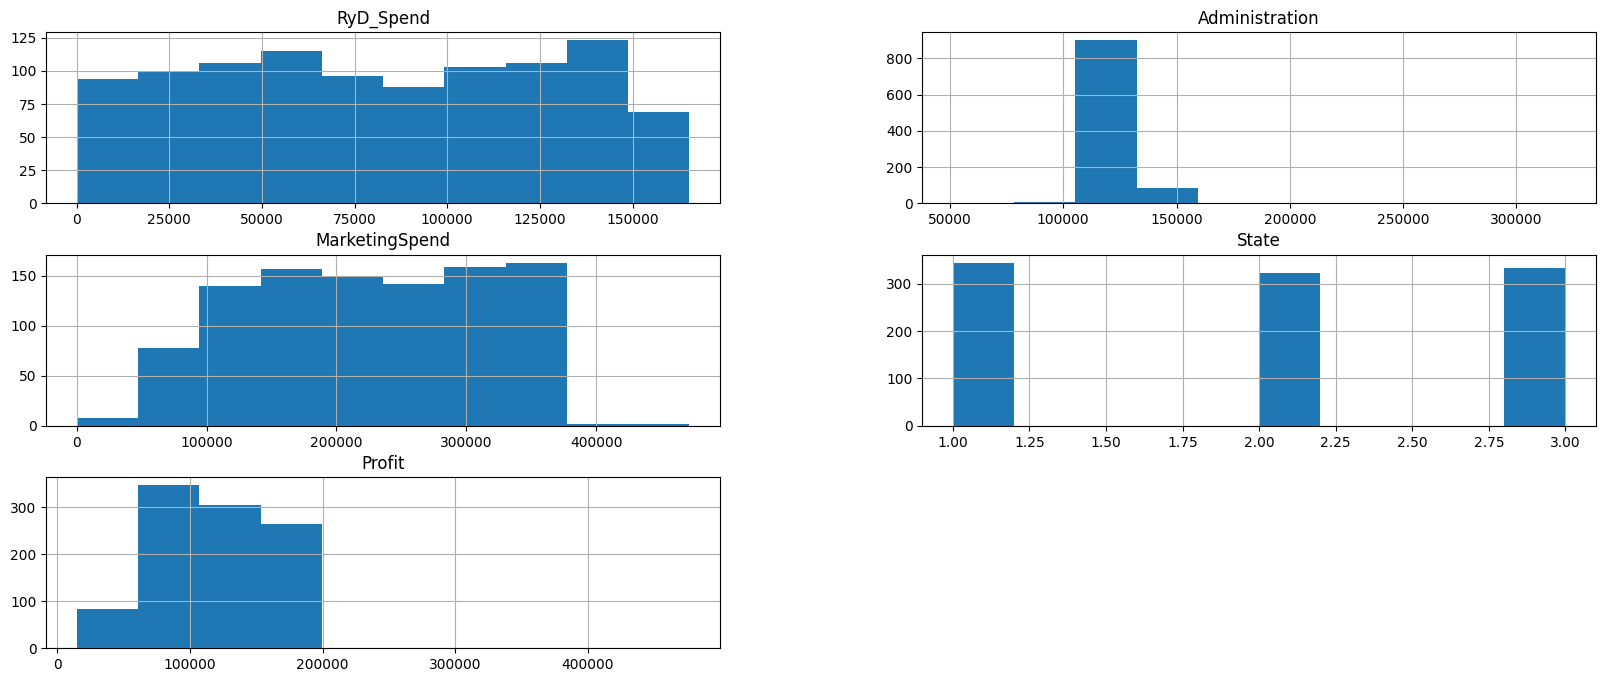

In [ ]:
#@title Histogramas

data.hist(figsize=(20,8))
plt.show()

In [ ]:
data.columns

Index(['RyD_Spend', 'Administration', 'MarketingSpend', 'State', 'Profit'], dtype='object')

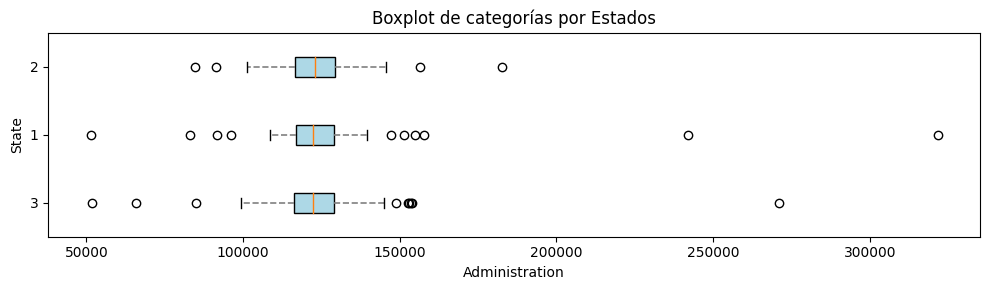

In [ ]:
#@title Boxplot por atributos variables

# Variable a analizar
target = 'Administration'

# Configuración de estilo y tamaño del gráfico
plt.figure(figsize=(10, 3))

# Crear el gráfico de boxplot con barrios en el eje vertical y precios en el eje horizontal
boxplot = plt.boxplot([data[data['State'] == label][target] for label in data['State'].unique()],
                      vert=False,  # Boxplots horizontales
                      patch_artist=True)  # Para personalizar colores de los cuadros

# Personalizar el color de los cuadros (box) y los bigotes (whisker)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')
for whisker in boxplot['whiskers']:
    whisker.set(color='gray', linewidth=1.2, linestyle='--')

# Etiquetas y título del gráfico
plt.yticks(range(1, len(data['State'].unique()) + 1), data['State'].unique())  # Etiquetas en el eje y
plt.xlabel(target)
plt.ylabel('State')
plt.title('Boxplot de categorías por Estados')

# Desactivar notación científica en el eje horizontal (precios)
plt.ticklabel_format(axis='x', style='plain')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

## Detección y filtrado de Outliers


In [ ]:
df = data.copy()

In [ ]:
# Dropping with outlier
#df = df[(df["MinTemp"]<2.3)&(df["MinTemp"]>-2.3)]
#df = df[(df["MaxTemp"]<2.3)&(df["MaxTemp"]>-2)]

## Correlaciones entre atributos

In [ ]:
df.corr()

,RyD_Spend,Administration,MarketingSpend,State,Profit
RyD_Spend,1.000000,0.582434,0.978407,-0.001360,0.945245
Administration,0.582434,1.000000,0.520465,-0.018386,0.741560
MarketingSpend,0.978407,0.520465,1.000000,-0.001420,0.917270
State,-0.001360,-0.018386,-0.001420,1.000000,-0.005718
Profit,0.945245,0.741560,0.917270,-0.005718,1.000000


### Matriz de correlación

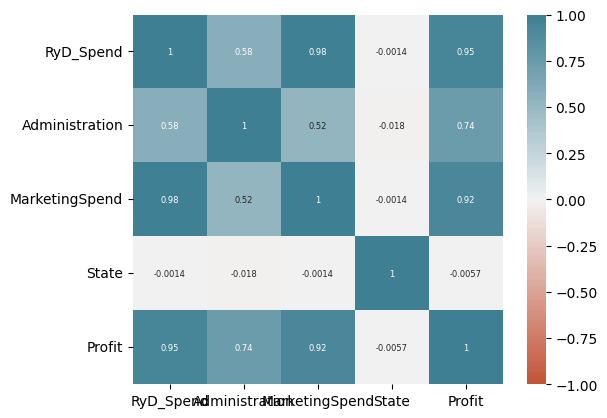

In [ ]:
#corr = df.drop(['State'], axis=1).corr()
corr = df.corr()
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True,
    annot_kws = {'size': 6}
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=0,
    horizontalalignment='center'
)
plt.show()

### Estandarización

In [ ]:
#@title Estandarización Z-score por librería
scaler = StandardScaler() # Creación del objeto scaler
X_scaled = scaler.fit_transform(df) # Cálculo de la media y la desviación estándar y aplicación de la transformación de estandarización.
df_std = pd.DataFrame(X_scaled, columns=df.columns)
df_std

,RyD_Spend,Administration,MarketingSpend,State,Profit
0,1.799023,1.105197,2.682968,1.226701,1.696301
1,1.739869,2.253692,2.378316,-1.202409,1.685343
2,1.543022,-1.730568,1.985407,0.012146,1.668041
3,1.348048,-0.340433,1.715177,1.226701,1.477956
4,1.299351,-2.504210,1.529110,0.012146,1.088053
...,...,...,...,...,...
995,-0.591946,-0.357871,-0.578727,-1.202409,-0.566079
996,1.145907,0.589023,1.125271,-1.202409,1.044865
997,0.400018,9.435756,0.010245,-1.202409,6.867965
998,1.005869,15.759379,0.606202,-1.202409,5.001869


# Árbol de Regresión

In [ ]:
X = df_std.iloc[:, :4] # 'RyD_Spend', 'Administration', 'MarketingSpend', 'State'
y = df_std.iloc[:, 4] # Profits

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
feature_list = list(X_train.columns)
feature_list

['RyD_Spend', 'Administration', 'MarketingSpend', 'State']

### Aplicación de la técnica

In [ ]:
clf = tree.DecisionTreeRegressor()

In [ ]:
regressor_tree = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [ ]:
from sklearn.tree import export_text
r = export_text(regressor_tree, feature_names=feature_list)
print(r)

|--- RyD_Spend <= 0.03
|   |--- RyD_Spend <= -0.90
|   |   |--- RyD_Spend <= -1.34
|   |   |   |--- RyD_Spend <= -1.74
|   |   |   |   |--- MarketingSpend <= -2.22
|   |   |   |   |   |--- RyD_Spend <= -1.75
|   |   |   |   |   |   |--- value: [-1.80]
|   |   |   |   |   |--- RyD_Spend >  -1.75
|   |   |   |   |   |   |--- value: [-1.96]
|   |   |   |   |--- MarketingSpend >  -2.22
|   |   |   |   |   |--- value: [-2.45]
|   |   |   |--- RyD_Spend >  -1.74
|   |   |   |   |--- RyD_Spend <= -1.54
|   |   |   |   |   |--- Administration <= -0.93
|   |   |   |   |   |   |--- RyD_Spend <= -1.68
|   |   |   |   |   |   |   |--- Administration <= -0.97
|   |   |   |   |   |   |   |   |--- RyD_Spend <= -1.72
|   |   |   |   |   |   |   |   |   |--- value: [-1.62]
|   |   |   |   |   |   |   |   |--- RyD_Spend >  -1.72
|   |   |   |   |   |   |   |   |   |--- RyD_Spend <= -1.72
|   |   |   |   |   |   |   |   |   |   |--- value: [-1.61]
|   |   |   |   |   |   |   |   |   |--- RyD_Spend >  -1.

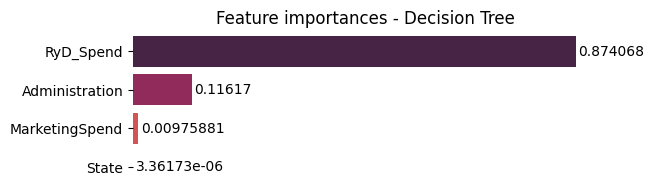

In [87]:
features_df = pd.DataFrame({'features': feature_list, 'importances': regressor_tree.feature_importances_ })

features_df_sorted = features_df.sort_values(by='importances', ascending=False)
plt.figure(figsize=(6,2))
g = sns.barplot(data=features_df_sorted, x='importances', y ='features', palette="rocket")
sns.despine(bottom = True, left = True)
g.set_title('Feature importances - Decision Tree')
g.set(xlabel=None)
g.set(ylabel=None)
g.set(xticks=[])
for value in g.containers:
    g.bar_label(value, padding=2)

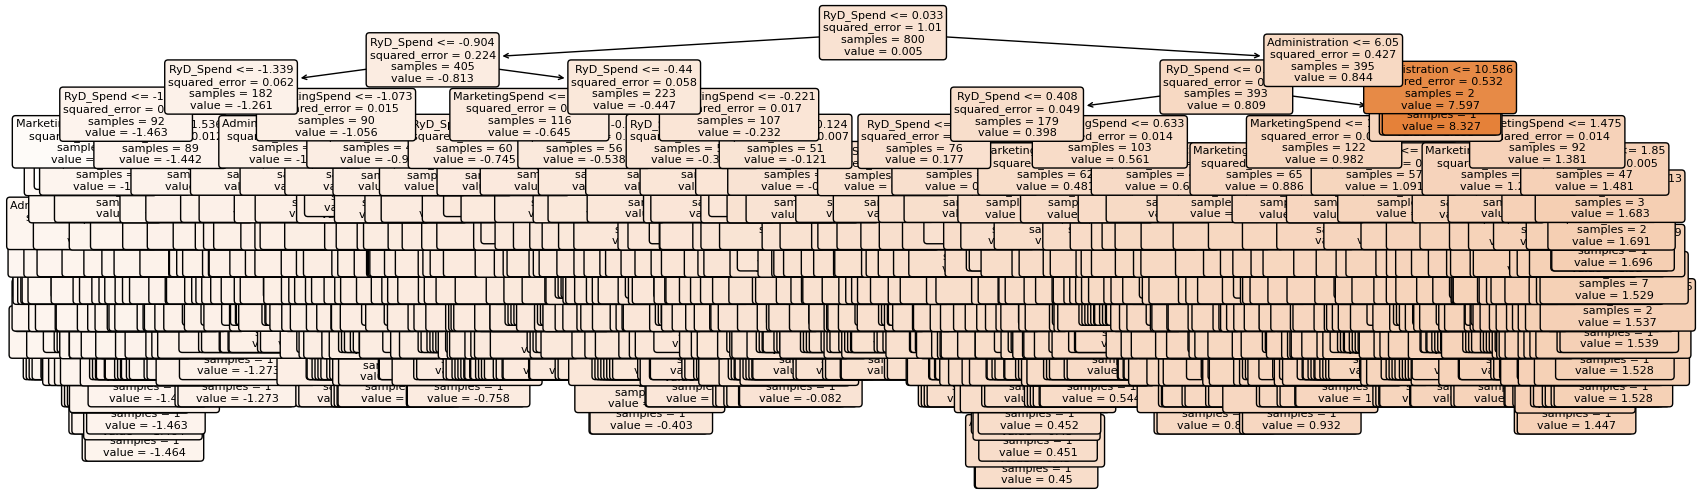

In [ ]:
features = feature_list

plt.figure(figsize=(20,6))
tree.plot_tree(regressor_tree,
                feature_names=features,
                fontsize=8,
                filled=True,
                rounded=True)
plt.show()

## Optimización de Hiperparámetros

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calcula el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio (MSE) en el conjunto de prueba:", mse)

Mejores hiperparámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Error cuadrático medio (MSE) en el conjunto de prueba: 0.055492701797002414


## Métricas

In [ ]:
y_test = y_test.astype(float)

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions) # medida de la bondad de ajuste del modelo

#primero calculamos el error absoluto porcentual (APE) para cada predicción y luego calculamos el MAPE promediando estos errores.
mape = np.mean(np.abs((y_test - predictions) / y_test) * 100)
# Calcular R-squared adjusted (R2 ajustado)
n = len(y_test)  # Número de observaciones
p = len(feature_list)  # Número de predictores (variables independientes)
r2_adjusted = 1 - ((1 - r2) * (n - 1) / (n - p - 1))  # tiene en cuenta la complejidad del modelo al penalizar el uso excesivo de predictores
rmse = np.sqrt(mse)

# Imprimir MAPE
print("Mean Absolute Percentage Error (MAPE):", mape)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)
print("R-squared adjusted (R2 ajustado):", r2_adjusted)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Percentage Error (MAPE): 1.6214452716671428
Mean Absolute Error (MAE): 0.021354828011722136
Mean Squared Error (MSE): 0.05561650766800989
Root Mean Squared Error (RMSE): 0.23583152390638934
R-squared (R2): 0.9419768201538908
R-squared adjusted (R2 ajustado): 0.9407866010801245
Root Mean Squared Error (RMSE): 0.23583152390638934


In [ ]:
tableResult = pd.DataFrame({'Actual':y_test, 'Predicted':predictions})
tableResult.head()

,Actual,Predicted
521,0.110185,0.117359
737,-0.193350,-0.196141
740,-0.657273,-0.661039
660,0.170310,0.173818
411,0.967223,0.968817
